In [1]:
%load_ext autoreload
%autoreload 2
import sys

path = "C:/Users/schiavaz/lava-nc/depth/"
sys.path.append(path)

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import open3d as o3d

import events_utils.filter as flt
import events_utils.visualize as vis
import events_utils.time_difference as td

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
events_raw = np.loadtxt(path + "data/slider-depth/events.txt")

In [374]:
events_ref = flt.filter_refract(events_raw, 0.001)

In [375]:
start_time = 2.4
duration = 0.1
events_t = flt.filter_time(events_ref, start_time, start_time+duration)

In [376]:
patch_center = (40, 77)
patch_size = 30
shape = (patch_size, patch_size)
events_board = flt.filter_patch(events_t, patch_center, patch_size)

shape = (patch_size, patch_size)

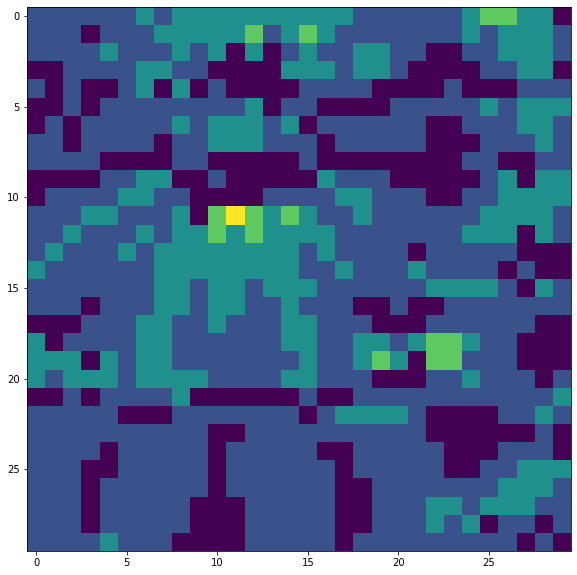

In [354]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.imshow(vis.events2img(events_board, shape, filter_polarity=False), interpolation="none")

In [355]:
time_diff_w_dict = {}
time_diff = td.compute_time_difference(events_board, shape, check_polarity=False)
time_diff_w_dict = td.compute_time_difference_warped(events_board, shape, start_time, shape, filter_polarity=False)
time_diff_w, count = td.median_from_dict(time_diff_w_dict, shape, 2)

time_diff_w_m = np.ma.masked_where(time_diff_w == 0, time_diff_w)
time_diff_w = 1 / time_diff_w_m

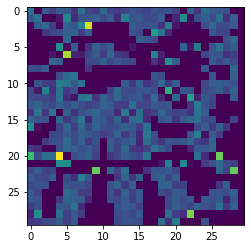

In [356]:
plt.imshow(time_diff)

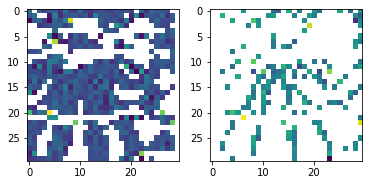

In [357]:
time_diff_m = np.ma.masked_where(time_diff == 0, time_diff)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(time_diff_m)
ax2.imshow(time_diff_w)

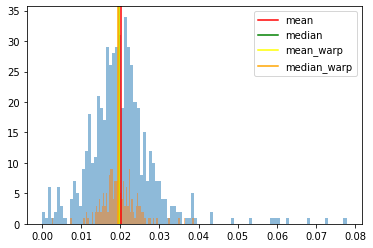

In [358]:
plt.hist(np.ma.masked_where(time_diff == 0, time_diff).compressed(), 100, alpha=0.5, density=False)
plt.hist(np.ma.masked_where(time_diff_w == 0, time_diff_w).compressed(), 100, alpha=0.5, density=False)
var = np.var(np.ma.masked_where(time_diff == 0, time_diff).compressed())
mean = np.mean(np.ma.masked_where(time_diff == 0, time_diff).compressed())
median = np.median(np.ma.masked_where(time_diff == 0, time_diff).compressed())

mean_w = np.mean(np.ma.masked_where(time_diff_w == 0, time_diff_w).compressed())
median_w = np.median(np.ma.masked_where(time_diff_w == 0, time_diff_w).compressed())

plt.axvline(x=mean, color="red", label="mean")
plt.axvline(x=median, color="green", label="median")

plt.axvline(x=mean_w, color="yellow", label="mean_warp")
plt.axvline(x=median_w, color="orange", label="median_warp")
plt.legend()

In [377]:
patch_center = (20, 183)
patch_size = 50
shape = (patch_size, patch_size)
events_bb = flt.filter_patch(events_t, patch_center, patch_size)

shape = (patch_size, patch_size)

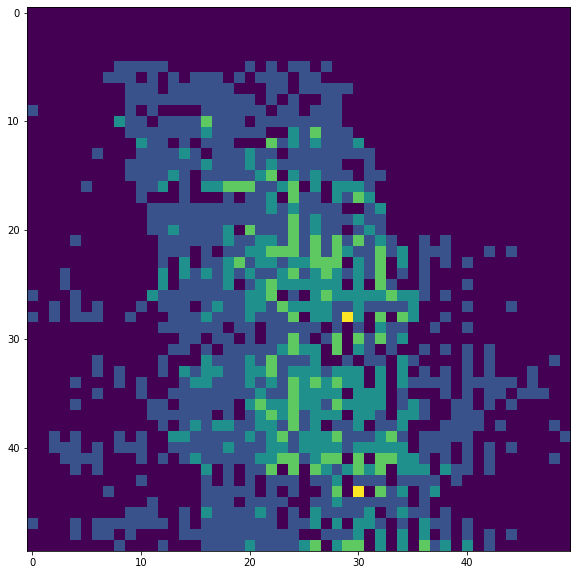

In [378]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.imshow(vis.events2img(events_bb, shape, filter_polarity=False), interpolation="none")

In [379]:
time_diff_w_dict = {}
time_diff = td.compute_time_difference(events_bb, shape, check_polarity=False)
time_diff_m = np.ma.masked_where(time_diff == 0, time_diff)
time_diff_w_dict = td.compute_time_difference_warped(events_bb, shape, start_time, shape, filter_polarity=False)
time_diff_w, count = td.median_from_dict(time_diff_w_dict, shape, 2)

time_diff_w_m = np.ma.masked_where(time_diff_w == 0, time_diff_w)
time_diff_w = 1 / time_diff_w_m

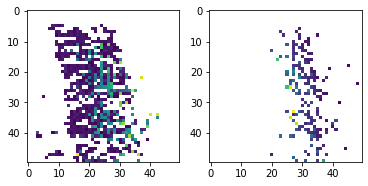

In [380]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(time_diff_m)
ax2.imshow(time_diff_w)

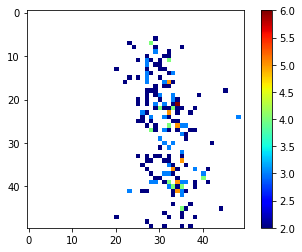

In [381]:
count = np.ma.masked_where(count == 0, count)
m = plt.imshow(count, interpolation="none", cmap="jet")
plt.colorbar(mappable=m)

In [ ]:
count_conv = np.zeros(count.shape)
conv_shape = (3, 3)
d = int(conv_shape[0]/2)
thresh = 9
for x in range(count_conv.shape[1]):
    for y in range(count_conv.shape[0]):
        pxs = count[y-d:y+d+1, x-d:x+d+1]
        c = pxs.data.sum()
        if c >= thresh:
            count_conv[y, x] = pxs.data.sum()
plt.imshow(count_conv)

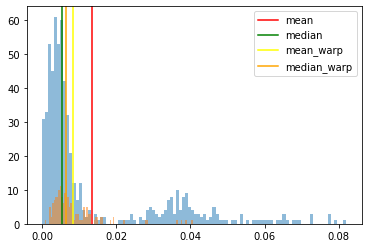

In [382]:
plt.hist(np.ma.masked_where(time_diff == 0, time_diff).compressed(), 100, alpha=0.5, density=False)
plt.hist(np.ma.masked_where(time_diff_w == 0, time_diff_w).compressed(), 100, alpha=0.5, density=False)
var = np.var(np.ma.masked_where(time_diff == 0, time_diff).compressed())
mean = np.mean(np.ma.masked_where(time_diff == 0, time_diff).compressed())
median = np.median(np.ma.masked_where(time_diff == 0, time_diff).compressed())

mean_w = np.mean(np.ma.masked_where(time_diff_w == 0, time_diff_w).compressed())
median_w = np.median(np.ma.masked_where(time_diff_w == 0, time_diff_w).compressed())

plt.axvline(x=mean, color="red", label="mean")
plt.axvline(x=median, color="green", label="median")

plt.axvline(x=mean_w, color="yellow", label="mean_warp")
plt.axvline(x=median_w, color="orange", label="median_warp")
plt.legend()

In [311]:
patch_center = (100, 120)
patch_size = 40
shape = (patch_size, patch_size)
events_p = flt.filter_patch(events_t, patch_center, patch_size)

shape = (patch_size, patch_size)

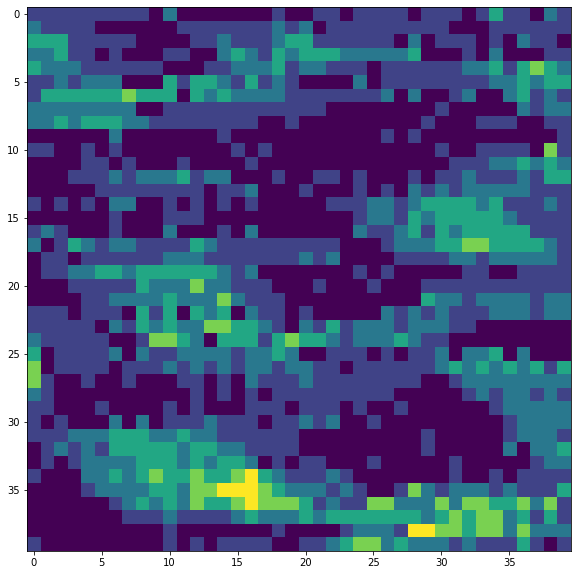

In [312]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.imshow(vis.events2img(events_p, shape, filter_polarity=False), interpolation="none")

In [313]:
time_diff_w_dict = {}
time_diff = td.compute_time_difference(events_p, shape, check_polarity=False)
time_diff_w_dict = td.compute_time_difference_warped(events_p, shape, start_time, shape, filter_polarity=False)
time_diff_w, count = td.median_from_dict(time_diff_w_dict, shape, 2)

time_diff_w_m = np.ma.masked_where(time_diff_w == 0, time_diff_w)
time_diff_w = 1 / time_diff_w_m

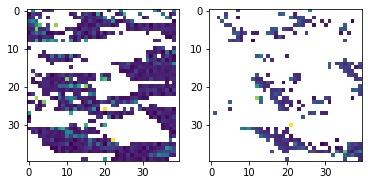

In [314]:
time_diff_m = np.ma.masked_where(time_diff == 0, time_diff)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(time_diff_m)
ax2.imshow(time_diff_w)

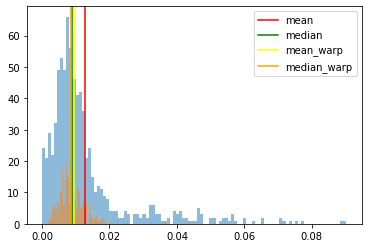

In [315]:
plt.hist(np.ma.masked_where(time_diff == 0, time_diff).compressed(), 100, alpha=0.5, density=False)
plt.hist(np.ma.masked_where(time_diff_w == 0, time_diff_w).compressed(), 100, alpha=0.5, density=False)
var = np.var(np.ma.masked_where(time_diff == 0, time_diff).compressed())
mean = np.mean(np.ma.masked_where(time_diff == 0, time_diff).compressed())
median = np.median(np.ma.masked_where(time_diff == 0, time_diff).compressed())

mean_w = np.mean(np.ma.masked_where(time_diff_w == 0, time_diff_w).compressed())
median_w = np.median(np.ma.masked_where(time_diff_w == 0, time_diff_w).compressed())

plt.axvline(x=mean, color="red", label="mean")
plt.axvline(x=median, color="green", label="median")

plt.axvline(x=mean_w, color="yellow", label="mean_warp")
plt.axvline(x=median_w, color="orange", label="median_warp")
plt.legend()